# Data Science & Engineering Methods 
## Assignment 1

*ML Data Cleaning and Feature Selection*

###Abstract:

Zomato is an online ordering and food delivering platform where the orders will be delivered by the couriers all around the country.

Zomato offers restaurant information, menus, and user reviews and more other options for their selected partners in the different cities. 
This dataset contains the information of the resturants in the Bengaluru city.

Reference: https://www.kaggle.com/datasets/rajeshrampure/zomato-dataset

Here the data has been visulazied and the quality has been checked.P-value,T-statistics,Histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library has been used to answer below questions about the dataset:

<br>• What are the data types? (Only numeric and categorical)
<br>• What are there missing values?
<br>• What are the likely distributions of the numeric variables?
<br>•	Which independent variables are useful to predict a target (dependent variable)?
<br>•	Which independent variables have missing data? How much
<br>•	Do the training and test sets have the same data?
<br>•	In the predictor variables independent of all the other predictor variables?
<br>•	Which predictor variables are the most important?
<br>•	Do the ranges of the predictor variables make sense?
<br>•	What are the distributions of the predictor variables?

<br> The predictors' significance is investigated, and it appears that 9 of the 16 independent variables are significant which can be further optimized for the better understanding.

###Getting our data

This dataset contains 50000 rows and 17 columns of data which is higher than GitHub's threshold of .csv files(Generally it is not larger than 100MB). 
So, I pulled the kaggle dataset data directly from Kaggle with my API tokens.

In [ ]:
# installing dependencies
!pip install eli5
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 6.3 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=f554a296306e8d62aa2dc6d7f68282532f812524708de674442d568416101364
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [ ]:
#making a directory for kaggle api

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"divyamyneni123","key":"2546107efd3aa943c0b742f6638a9937"}'}

Downloaded the data directly from the Kaggle.Check the below link for the reference to work on your dataset.
<br> https://www.kaggle.com/general/74235

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
# dowloading the data set from the kaggle and reading it
! kaggle datasets list -s zomato



ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
himanshupoddar/zomato-bangalore-restaurants                  Zomato Bangalore Restaurants                        89MB  2019-03-31 09:48:43          49723       1203  1.0              
shrutimehta/zomato-restaurants-data                          Zomato Restaurants Data                              5MB  2018-03-13 04:56:25          47037        632  0.7941176        
rishikeshkonapure/zomato                                     Zomato                                              89MB  2022-10-29 06:56:33           1963         56  1.0              
rajeshrampure/zomato-dataset                                 Zomato Dataset     

Searching my dataset from the above all the kaggle datasets on Zomato.

In [ ]:
# searching for my dataset from the list below
! kaggle datasets download -d rajeshrampure/zomato-dataset 

 95% 85.0M/89.0M [00:00<00:00, 195MB/s]
100% 89.0M/89.0M [00:00<00:00, 179MB/s]


In [ ]:
#unzip the downloaded file
!unzip zomato-dataset.zip

Archive:  zomato-dataset.zip
  inflating: zomato.csv              


##Reading Data

In [ ]:
data = pd.read_csv("zomato.csv")
data.shape
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

The data has been read and has been shaped accordingly and head method shows the first 5 rows of the data set.

#Cleaning Data

###Dropping columns 

The columns phone, dish_liked, url, menu_item, and reviews_list has been dropped because they dont add characteristics to the data.

In [ ]:
data.drop(['url','address','phone','menu_item','dish_liked','reviews_list',"listed_in(city)"],axis = 1,inplace=True)
data.head(3)

name online_order book_table   rate  votes      location  \
0            Jalsa          Yes        Yes  4.1/5    775  Banashankari   
1   Spice Elephant          Yes         No  4.1/5    787  Banashankari   
2  San Churro Cafe          Yes         No  3.8/5    918  Banashankari   

             rest_type                        cuisines  \
0        Casual Dining  North Indian, Mughlai, Chinese   
1        Casual Dining     Chinese, North Indian, Thai   
2  Cafe, Casual Dining          Cafe, Mexican, Italian   

  approx_cost(for two people) listed_in(type)  
0                         800          Buffet  
1                         800          Buffet  
2                         800          Buffet

#### Renaming Column Names
The column names has been renamed accordingly for easy understanding and ease. 

In [ ]:
data.rename(columns={'name':'Restaurant','online_order': 'Online Booking', 'book_table':'Dine-In','votes': 'Number of Votes','location':'City','rest_type': 'Restaurant Type', 'cuisines': 'Cuisines','rate':'Rating','approx_cost(for two people)':'Cost(Rupees)','listed_in(type)':'Meal Type'},inplace=True)
data.head(3)

Restaurant Online Booking Dine-In Rating  Number of Votes  \
0            Jalsa            Yes     Yes  4.1/5              775   
1   Spice Elephant            Yes      No  4.1/5              787   
2  San Churro Cafe            Yes      No  3.8/5              918   

           City      Restaurant Type                        Cuisines  \
0  Banashankari        Casual Dining  North Indian, Mughlai, Chinese   
1  Banashankari        Casual Dining     Chinese, North Indian, Thai   
2  Banashankari  Cafe, Casual Dining          Cafe, Mexican, Italian   

  Cost(Rupees) Meal Type  
0          800    Buffet  
1          800    Buffet  
2          800    Buffet

###Missing Data

We have three methods for imputing missing data. 
<br>Median
<br>Dropping 
<br>Machine Learning
Here the data with the NaN values will be checked and missing count for each column will be taken in a loop.
<br>1.isna() is a method to check the not a number value 
<br>2.%missing will the missing values of the each columns out of 100.

In [ ]:
missing_list = data.columns[data.isna().any()].tolist() 
missing_count = []      
for i in missing_list:
  missing_count.append(sum(pd.isnull(data[str(i)])))

d = {'Missing_Column':missing_list,'Missing_Values':missing_count}
Missing_DF = pd.DataFrame(d)
Missing_DF["%_Missing"] = (Missing_DF['Missing_Values'] / data.shape[0]) * 100
Missing_DF

Missing_Column  Missing_Values  %_Missing
0           Rating            7775  15.033741
1             City              21   0.040606
2  Restaurant Type             227   0.438927
3         Cuisines              45   0.087012
4     Cost(Rupees)             346   0.669026

**Note**: I chose to drop NaN but other notebooks chose to use the mean to replace empty values.
We see that most of our missing data is Rating. The median method in this case would not make sense for null values because rating for a restaurant should not be effected by the rest of the data. For example, a new restaurant that did not get the chance pass the inspection exam with rating "NEW" should not be replaced by a 3 star rating when there is an equal chance the restaurant could be of lower or higher quality. We could potentially explore Machine Learning but for the purposes of the training data we can justify using the dropping method for columns that are missing 5% or less of data since it is a very small percentage of missing data.





In [ ]:
data = data.dropna()
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant       30958 non-null  object
 1   Online Booking   30958 non-null  object
 2   Dine-In          30958 non-null  object
 3   Rating           30958 non-null  object
 4   Number of Votes  30958 non-null  int64 
 5   City             30958 non-null  object
 6   Restaurant Type  30958 non-null  object
 7   Cuisines         30958 non-null  object
 8   Cost(Rupees)     30958 non-null  object
 9   Meal Type        30958 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


Data with Nan and duplicates has been dropped.

In [ ]:
data.isnull().sum()

Restaurant         0
Online Booking     0
Dine-In            0
Rating             0
Number of Votes    0
City               0
Restaurant Type    0
Cuisines           0
Cost(Rupees)       0
Meal Type          0
dtype: int64

### Removing Duplicate values
In case we have any duplicated rows, we remove duplicates so that we ensure there is no repetation.

In [ ]:
data.drop_duplicates(inplace=True)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant       30958 non-null  object
 1   Online Booking   30958 non-null  object
 2   Dine-In          30958 non-null  object
 3   Rating           30958 non-null  object
 4   Number of Votes  30958 non-null  int64 
 5   City             30958 non-null  object
 6   Restaurant Type  30958 non-null  object
 7   Cuisines         30958 non-null  object
 8   Cost(Rupees)     30958 non-null  object
 9   Meal Type        30958 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.6+ MB


### Cleaning individual columns
We should check each and individual columns and clean the values which are not given or not a number

In [ ]:
data['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Here from the above data we are having the values NEW and '_' which are not a number and those value are being replaced with NaN
<br> A function clean has been defined which checks the values that are not a number 
<br>Second part converts the above N/P rating to the rating to a string value taking the numerator part and again converting to the actual float value

In [ ]:
def clean(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
    
data['Rating']=data['Rating'].apply(clean)
data['Rating'].head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30958 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant       30958 non-null  object 
 1   Online Booking   30958 non-null  object 
 2   Dine-In          30958 non-null  object 
 3   Rating           29638 non-null  float64
 4   Number of Votes  30958 non-null  int64  
 5   City             30958 non-null  object 
 6   Restaurant Type  30958 non-null  object 
 7   Cuisines         30958 non-null  object 
 8   Cost(Rupees)     30958 non-null  object 
 9   Meal Type        30958 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.6+ MB


In [ ]:
data['Rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

#####*Location*

In [ ]:
data['City'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

Value_Counts gives the count of the values in the descending order list as shown below.

In [ ]:
data['City'].value_counts(ascending=False)

BTM                      2228
Indiranagar              1653
Whitefield               1630
Koramangala 5th Block    1577
HSR                      1558
                         ... 
Central Bangalore           5
Yelahanka                   4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: City, Length: 92, dtype: int64

Looking at the breakdown of cities we see no typos or errors and can proceed.

####Cost

In [ ]:
data['Cost(Rupees)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

Examining the unique values of Cost, we can see that the cost is stored as text with type object. We can correct the type to integer so that we can later model the variables.

In [ ]:
data = data.dropna()

In [ ]:
def money(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

data['Cost(Rupees)']=data['Cost(Rupees)'].apply(money)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29638 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant       29638 non-null  object 
 1   Online Booking   29638 non-null  object 
 2   Dine-In          29638 non-null  object 
 3   Rating           29638 non-null  float64
 4   Number of Votes  29638 non-null  int64  
 5   City             29638 non-null  object 
 6   Restaurant Type  29638 non-null  object 
 7   Cuisines         29638 non-null  object 
 8   Cost(Rupees)     29638 non-null  int64  
 9   Meal Type        29638 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 2.5+ MB


Function 'Money' has been used and the values with"," has been removed and changed to a integer value

####Dine_In Booking

In [ ]:
data['Dine-In'].unique()

array(['Yes', 'No'], dtype=object)

Dine- In has no typos so we can proceed.

####Online Booking

In [ ]:
data['Online Booking'].unique()

array(['Yes', 'No'], dtype=object)

Online  has no typos so we can proceed.

###Resturant Type

In [ ]:
data['Restaurant Type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [ ]:
data['Restaurant Type'].value_counts(ascending=False)

Quick Bites                   9492
Casual Dining                 7151
Cafe                          2420
Dessert Parlor                1309
Delivery                      1054
                              ... 
Bakery, Food Court               2
Food Court, Beverage Shop        2
Bakery, Beverage Shop            1
Quick Bites, Kiosk               1
Dessert Parlor, Food Court       1
Name: Restaurant Type, Length: 87, dtype: int64


The Restaurant type has lots of values with multiple values for one restaurant. We can simplify the types of different varities into a general set of groups for better understanding.
<br>Function typesimplfy has been applied to the dataset .

In [ ]:
def typeSimplify(value):
    value = str(value)
    if 'Sweet' in value or 'Dessert' in value or 'Confectionery' in value:
        return 'Dessert'
    elif 'Quick Bites' in value:
      return 'Quick Bites'
    elif 'Bar' in value or 'Microbrewery' in value:
      return 'Bar'
    elif 'Bakery' in value:
      return 'Bakery'
    elif 'Casual Dining' in value:
      return 'Casual Dining'
    elif 'Fine Dining' in value:
      return 'Fine Dining'
    elif 'Food Court' in value:
      return 'Street Food'
    elif 'Fast Food' in value:
      return 'Fast Food'
    elif 'Cafe' in value:
      return 'Cafe'
    elif 'North Indian' in value:
      return 'North Indian'
    elif 'South Indian' in value:
      return 'South Indian'
    else:
        return value
    
data['Restaurant Type']=data['Restaurant Type'].apply(typeSimplify)
data['Restaurant Type'].head(10)

0    Casual Dining
1    Casual Dining
2    Casual Dining
3      Quick Bites
4    Casual Dining
5    Casual Dining
6    Casual Dining
7    Casual Dining
8             Cafe
9             Cafe
Name: Restaurant Type, dtype: object

In [ ]:
data['Restaurant Type'].unique()

array(['Casual Dining', 'Quick Bites', 'Cafe', 'Delivery', 'Mess',
       'Dessert', 'Pub', 'Bakery', 'Takeaway, Delivery', 'Fine Dining',
       'Beverage Shop', 'Bar', 'Kiosk', 'Food Truck', 'Takeaway',
       'Lounge', 'Street Food', 'Dhaba', 'Club', 'Bhojanalya'],
      dtype=object)

In [ ]:
data['Restaurant Type'].isnull().sum()

0

#####Meal Type

In [ ]:
data['Meal Type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [ ]:
data['Meal Type'].value_counts()

Delivery              13504
Dine-out              10867
Desserts               2031
Cafes                  1136
Drinks & nightlife      877
Buffet                  655
Pubs and bars           568
Name: Meal Type, dtype: int64

Meal Type has no typos so we can proceed.

####Cuisine

In [ ]:
data['Cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [ ]:
data['Cuisines'].value_counts()

North Indian                                1518
North Indian, Chinese                       1339
South Indian                                 851
Bakery, Desserts                             455
Biryani                                      410
                                            ... 
South Indian, Mangalorean, Chinese             1
Fast Food, Andhra                              1
Kerala, Biryani, North Indian, Chettinad       1
North Indian, Street Food, Fast Food           1
North Indian, Chinese, Arabian, Momos          1
Name: Cuisines, Length: 2367, dtype: int64

Cuisines have multiple values for one restaurant with repeating keywords but they show has different categories so they are generalized and grouped into small categories for better analysis.

In [ ]:
data['Cuisines'].isnull().sum()

0

In [ ]:
def cuisineSimplify(value):
    value = str(value)
    if 'Italian' in value or 'Pizza' in value:
        return 'Italian'
    elif 'African' in value:
      return 'African'
    elif 'Continental' in value:
      return 'Continental'
    elif "Mughlai" in value or 'Middle Eastern' in value or 'Biryani' in value or 'Arabian' in value or 'Turkish' in value:
      return 'Middle Eastern'
    elif 'Burger' in value or 'American' in value or 'Salad' in value or 'Sandwich' in value:
      return 'American'
    elif 'Indian' in value and 'Chinese' in value:
      return 'Asian Fusion'
    elif 'Thai' in value or 'Japanese' in value or 'Asian' in value or 'Chinese' in value or 'Tibetan' in value or 'Momo' in value:
      return 'Asian'
    elif 'Mexican' in value:
      return 'Mexican'
    elif 'Street Food' in value:
      return 'Street Food'
    elif 'Fast Food' in value:
      return 'Fast Food'
    elif 'Cafe' in value:
      return 'Cafe'
    elif 'North Indian' in value or 'Rajasthani' in value or "Gujarati" in value or 'Bengali' in value:
      return 'North Indian'
    elif 'South Indian' in value or 'Kerala' in value or 'Bengali' in value or 'Andhra' in value or 'Maharashtrian':
      return 'South Indian'
    elif 'Mediterranean' in value:
      return 'Mediterranean'
    elif 'Sweet' in value or 'Dessert' in value or 'Confectionery' in value or 'Mithai' in value:
      return 'Dessert'
    elif 'Cafe' in value:
      return 'Cafe'
    else:
        return value
    
data['Cuisines']=data['Cuisines'].apply(cuisineSimplify)
data['Cuisines'].head(10)


0    Middle Eastern
1      Asian Fusion
2           Italian
3      North Indian
4      North Indian
5      North Indian
6      Asian Fusion
7           Italian
8           Italian
9           Italian
Name: Cuisines, dtype: object

In [ ]:
data['Cuisines'].unique()

array(['Middle Eastern', 'Asian Fusion', 'Italian', 'North Indian',
       'Cafe', 'Continental', 'Fast Food', 'American', 'South Indian',
       'Asian', 'Street Food', 'African', 'Mexican'], dtype=object)

####Resturant

In [ ]:
data['Restaurant'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ...,
       'The Nest - The Den Bengaluru', 'Nawabs Empire',
       'SeeYa Restaurant'], dtype=object)

In [ ]:
data.groupby('Restaurant').count().head()

Online Booking  Dine-In  Rating  \
Restaurant                                                              
#FeelTheROLL                                       2        2       2   
#L-81 Cafe                                         4        4       4   
#refuel                                            3        3       3   
1000 B.C                                           2        2       2   
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C               2        2       2   

                                      Number of Votes  City  Restaurant Type  \
Restaurant                                                                     
#FeelTheROLL                                        2     2                2   
#L-81 Cafe                                          4     4                4   
#refuel                                             3     3                3   
1000 B.C                                            2     2                2   
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C                2     2                2   

                                      Cuisines  Cost(Rupees)  Meal Type  
Restaurant                                                               
#FeelTheROLL                                 2             2          2  
#L-81 Cafe                                   4             4          4  
#refuel                                      3             3          3  
1000 B.C                                     2             2          2  
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         2             2          2

Restaurant names have some different characters so that should be replaced by the alphabets using the regex expression which is applied on the data set.

In [ ]:
#Remove random characters

data['Restaurant']=data['Restaurant'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [ ]:
data.groupby('Restaurant').count().head()

Online Booking  Dine-In  Rating  Number of Votes  City  \
Restaurant                                                             
#FeelTheROLL               2        2       2                2     2   
#L-81 Cafe                 4        4       4                4     4   
#refuel                    3        3       3                3     3   
1000 B.C                   2        2       2                2     2   
100C                       2        2       2                2     2   

              Restaurant Type  Cuisines  Cost(Rupees)  Meal Type  
Restaurant                                                        
#FeelTheROLL                2         2             2          2  
#L-81 Cafe                  4         4             4          4  
#refuel                     3         3             3          3  
1000 B.C                    2         2             2          2  
100C                        2         2             2          2

##Data transforming, Feature creation and Analysis

All the cleaning we have done has been restored into the data_clean so that we dont need to lose the data.

In [ ]:
data_clean = data 

###Analyzing Rating

Analysis the data so that so that we can check if the data is having some sort of relationship with the data required to build a meaningful model.

In [ ]:
data_clean['Rating'].describe()

count    29638.000000
mean         3.732850
std          0.452188
min          1.800000
25%          3.400000
50%          3.800000
75%          4.100000
max          4.900000
Name: Rating, dtype: float64

With the minimum, maxium, and mean values being evenly spread out, we can safely guess that the column is normally distributed. But let's see this graphically.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


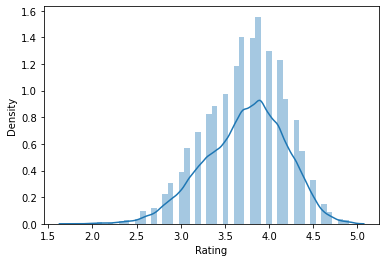

In [ ]:
sns.distplot(data_clean['Rating']);

In [ ]:
print("Skewness: %f" % data_clean['Rating'].skew())
print("Kurtosis: %f" % data_clean['Rating'].kurt())

Skewness: -0.360923
Kurtosis: -0.058365


<Figure size 576x360 with 0 Axes>

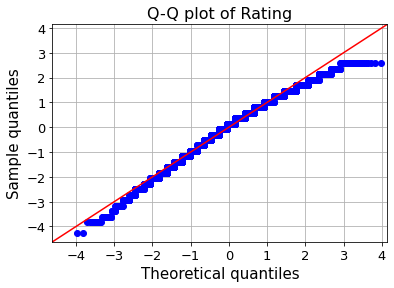

In [ ]:
from statsmodels.graphics.gofplots import qqplot
  
plt.figure(figsize=(8,5))
fig=qqplot(data_clean['Rating'],line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of {}".format('Rating'),fontsize=16)
plt.grid(True)
plt.show()

By analyzing the QQPlot and distribution plot, we see that Rating follows a general normal distribution with a very slight left skew. Thus, we can use a linear model to predict the rating of a restaurant.

**Which independent variables are useful to predict a target (dependent variable)?**

####Analyzing Numerical Variables

<Figure size 576x360 with 0 Axes>

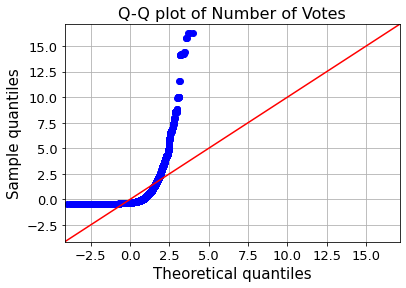

<Figure size 576x360 with 0 Axes>

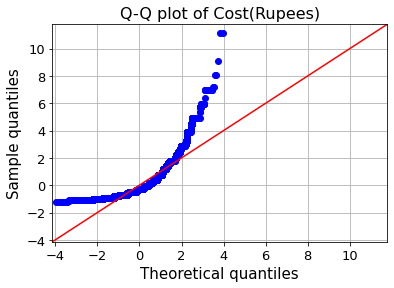

In [ ]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_temp=data_clean[['Number of Votes', 'Cost(Rupees)']]
for c in data_temp.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_temp[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()


Looking at the Q-Q plot above, it appears that both numeric independent variables are not normally distributed but instead follow a exponential distribution
The predictors looks right skewed with a few outliers for entries for the higher values

In [ ]:
print("Skewness of Votes: %f" % data_clean['Number of Votes'].skew())
print("Kurtosis of Votes: %f" % data_clean['Number of Votes'].kurt())
print("Skewness of Cost: %f" % data_clean['Cost(Rupees)'].skew())
print("Kurtosis of Cost: %f" % data_clean['Cost(Rupees)'].kurt())

Skewness of Votes: 6.156129
Kurtosis of Votes: 57.959362
Skewness of Cost: 2.259205
Kurtosis of Cost: 7.984325


Double checking we see an indeed right skewness of both variables. The high kurtosis tells us that the data has heavier tails (or outliers). We can fix this with a log transformation.

In [ ]:
from scipy.stats import norm
from scipy import stats
#log transformation
data_clean['Number of Votes'] = np.log(data_clean['Number of Votes'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2536: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


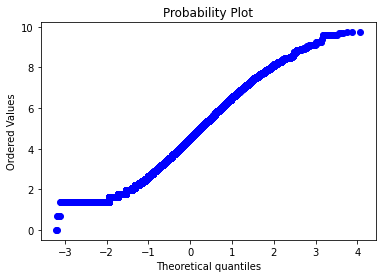

In [ ]:
#transformed histogram and normal probability plot

fig = plt.figure()
res = stats.probplot(data_clean['Number of Votes'], plot=plt)

By applying a log transformation, we can see the mean (center) of the dataset shift to the left with a thicker distribution. Followed by the probability plot which shows us a better linear line. Phew

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


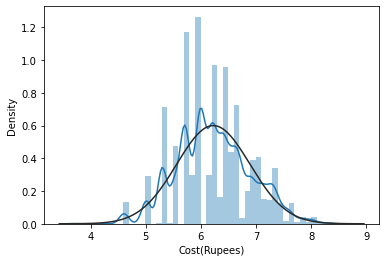

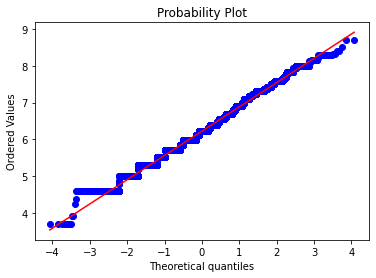

In [ ]:
#data transformation
data_clean['Cost(Rupees)'] = np.log(data_clean['Cost(Rupees)'])

#transformed histogram and normal probability plot
sns.distplot(data_clean['Cost(Rupees)'], fit=norm);
fig = plt.figure()
res = stats.probplot(data_clean['Cost(Rupees)'], plot=plt)

The distribution plot produced a normal distribution and the probability plot follows a diagonal line. We can now proceed to analyze our numerical data.

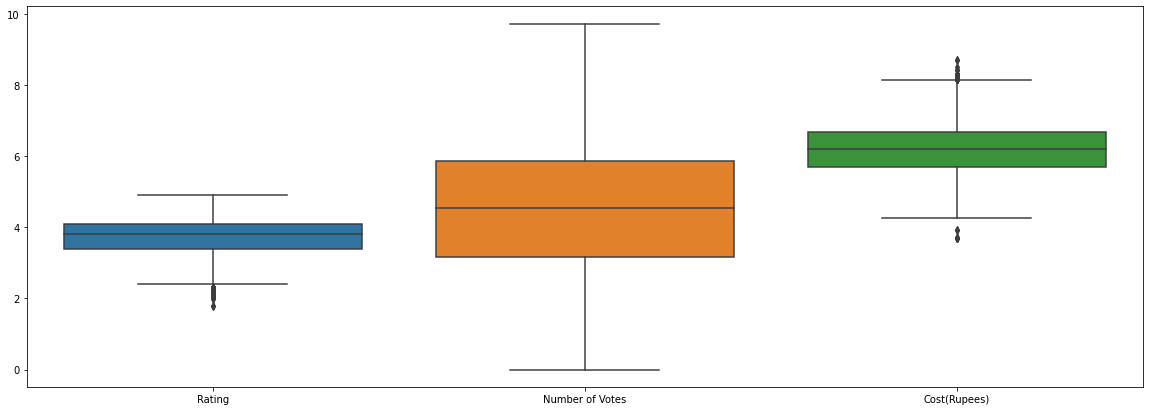

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data_clean)

The boxplot shows the distributions of the the numerical variables in one view. We can see that Rating and Cost have an even distribution with very few outliers. On the other hand, we still see Votes having more data associated with higher votes and a larger trail of outliers as its tail. This can be telling that the Votes might be an influential predictor on the rating values. The distribution of Votes makes sense however as there are more likely to be votes on a restaurant than few.

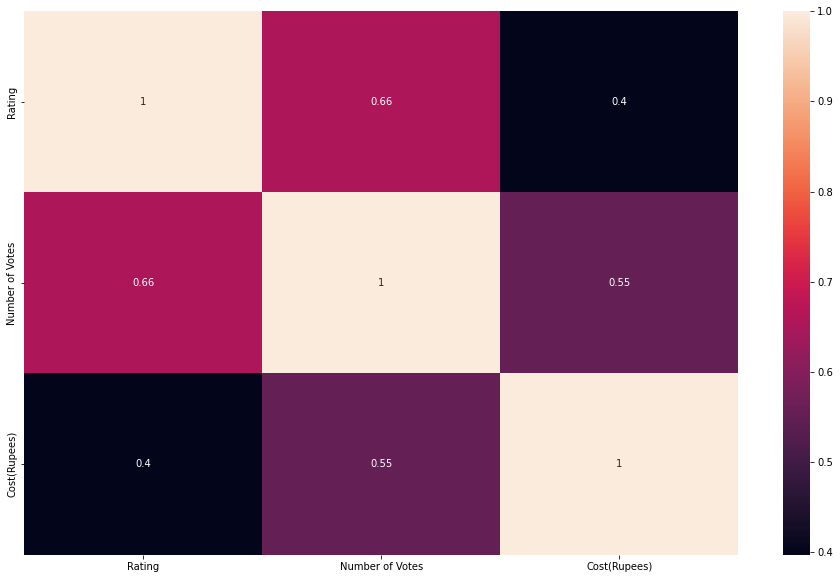

In [ ]:
plt.figure(figsize = (16, 10))
corr=data_clean.corr()
sns.heatmap(corr, annot = True)
plt.show()

As alluded to previously, we can see in the heatmap that the Number of Votes has a higher correlation to Rating than Cost(Rupees). There might be some multicollinearity between Cost and Votes but we will investigate that soon.

##Analyzing Catagorical Values

In addition to checking if our numerical variables' influence on the data, we must also check the catagorical variables' influence as well.

Before we analyze the correlations, we must drop the Restaurant column as it contains unique values that would make our views messy.

In [ ]:
data_clean.drop(['Restaurant'],axis = 1,inplace=True)
categorical = data_clean.select_dtypes(include= [np.object]).columns

<ipython-input-54-b03726bf2f67>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = data_clean.select_dtypes(include= [np.object]).columns


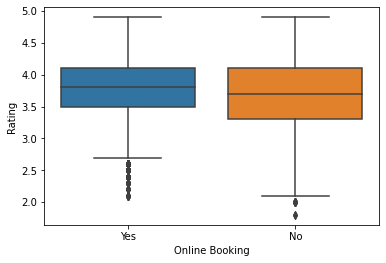

In [ ]:
sns.boxplot(x='Online Booking',y='Rating' , data = data_clean)

Online Ordering has two options: Yes or No. By plotting a box plot against Rating we see that the mean values of both yeses and nos are very similar despite there being more nos. We can predict that Online Ordering does not impact the rating of restaurants.

<Figure size 1152x720 with 0 Axes>

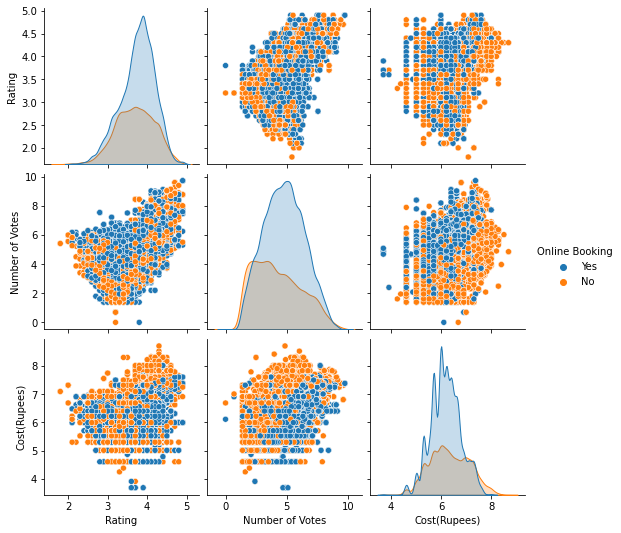

In [ ]:
plt.figure(figsize=(16,10))
sns.pairplot(data=data_clean, hue='Online Booking')
plt.show()

And much to our prediction, we can see that Online Ordering is evenly spread out across each plot with no clear separations.

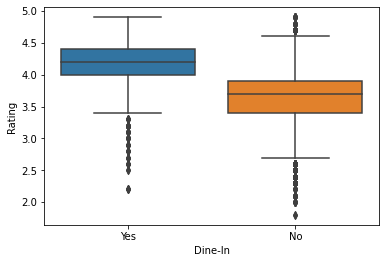

In [ ]:
sns.boxplot(x='Dine-In',y='Rating' , data = data_clean)

Similarly, Reservation Needed consists of only yeses and nos. Plotting the box plot we see that the restaurants that require a reservation have a higher average rating than restaurants that don't. We can predict that booking a restaurant will have significance on rating.

<Figure size 1152x720 with 0 Axes>

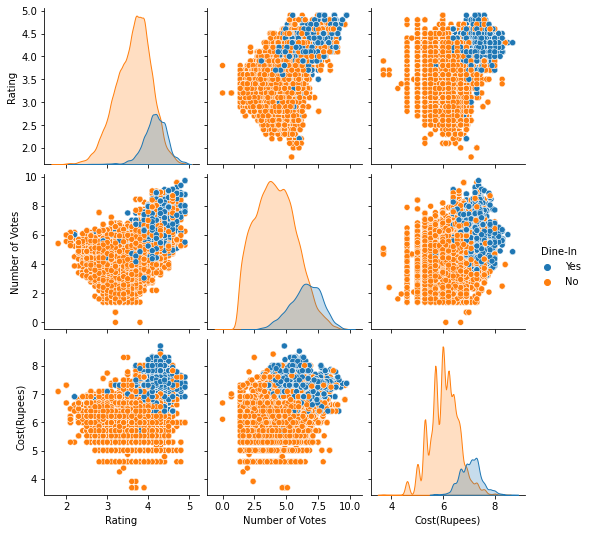

In [ ]:
plt.figure(figsize=(16,10))
sns.pairplot(data=data_clean, hue='Dine-In')
plt.show()

Highlighting our pairplots with the Reservation Needed column, we can see that reservations tend to gravitate towards higher ratings, higher votes, and higher costs.

This makes sense! When going to a 5 star Michelin restaurant, you would expect the food to be expensive and lots of reviews raving about the food.

We can similarly, check the distributions of the other catagorical variables by plotting them on our pairplots.

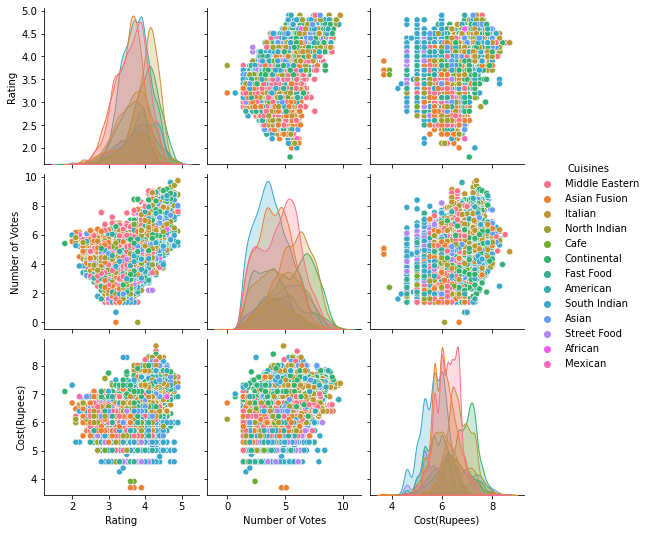

In [ ]:
sns.pairplot(data_clean, hue='Cuisines')

Cuisines look evenly spread out across each plot. We can assume there is no influence on the cuisine over the rating.

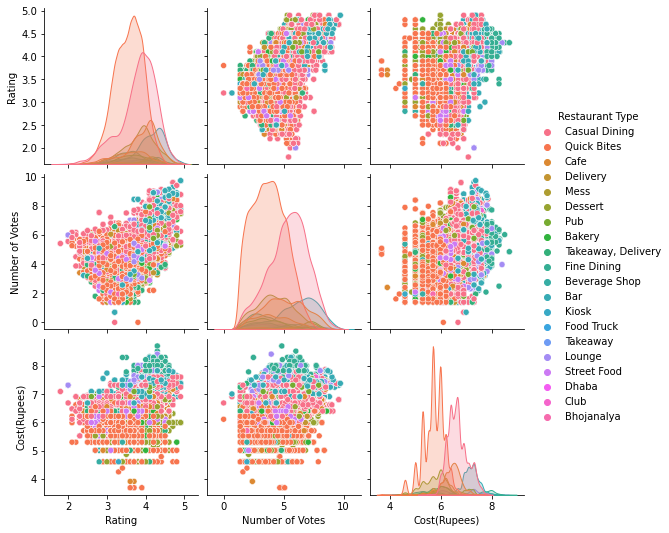

In [ ]:
sns.pairplot(data_clean, hue='Restaurant Type')

Right of the bat I see a lot of pinks and reds but there is no clear groups of restaurant types rated higher than another.

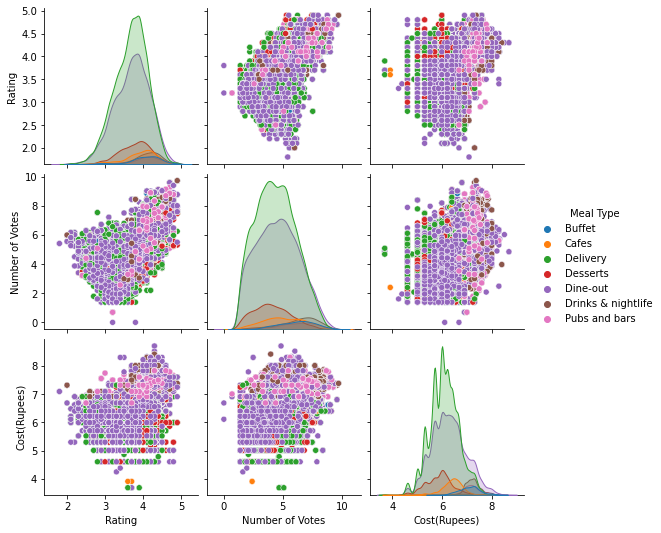

In [ ]:
sns.pairplot(data_clean, hue='Meal Type')

Again, we see a lot of purples and pinks but there is no clear distinguished groups showing one meal type is rated higher than the other.

##Standardizing our data

Now that we see each variable individually, let us see the bigger picture on how these variable interact with each other. This is important since in the real world many factors influence an outcome.

First, let's convert the binary catagorical columns to binary numerical columns so that our tools can understand the data better.

In [ ]:
data_clean['Dine-In'] = data_clean['Dine-In'].map({'Yes': 1, 'No': 0})

In [ ]:
data_clean['Online Booking'] = data_clean['Online Booking'].map({'Yes': 1, 'No': 0})

Similarly, we can convert our catagorical variables to numerical ones by creating a new column for each group with a binary value of 1 if that value belongs to that entry (0 if not).

In [ ]:
#Creating binary vaiables for Categorical Cols
data_norm = pd.get_dummies(data_clean)

Now we can check for the correlations of all variables in one view.

In [ ]:
data_norm.corr()

Online Booking   Dine-In    Rating  \
Online Booking                      1.000000 -0.067144  0.056666   
Dine-In                            -0.067144  1.000000  0.446543   
Rating                              0.056666  0.446543  1.000000   
Number of Votes                     0.129597  0.505110  0.655217   
Cost(Rupees)                       -0.107635  0.593552  0.397029   
...                                      ...       ...       ...   
Meal Type_Delivery                  0.284723 -0.162875 -0.103410   
Meal Type_Desserts                 -0.045895 -0.086740  0.035879   
Meal Type_Dine-out                 -0.156285  0.022922 -0.047146   
Meal Type_Drinks & nightlife       -0.146884  0.224108  0.131085   
Meal Type_Pubs and bars            -0.101035  0.166261  0.097932   

                              Number of Votes  Cost(Rupees)  City_BTM  \
Online Booking                       0.129597     -0.107635  0.052359   
Dine-In                              0.505110      0.593552 -0.087937   
Rating                               0.655217      0.397029 -0.066417   
Number of Votes                      1.000000      0.552614 -0.084541   
Cost(Rupees)                         0.552614      1.000000 -0.119584   
...                                       ...           ...       ...   
Meal Type_Delivery                  -0.095882     -0.195057  0.071865   
Meal Type_Desserts                  -0.074913     -0.140059 -0.028058   
Meal Type_Dine-out                  -0.011655      0.044938 -0.018278   
Meal Type_Drinks & nightlife         0.163691      0.266037 -0.037357   
Meal Type_Pubs and bars              0.108930      0.190302 -0.027091   

                              City_Banashankari  City_Banaswadi  \
Online Booking                        -0.005411       -0.011342   
Dine-In                               -0.033281       -0.044568   
Rating                                -0.018898       -0.053931   
Number of Votes                       -0.014513       -0.058936   
Cost(Rupees)                          -0.049897       -0.040156   
...                                         ...             ...   
Meal Type_Delivery                    -0.006587       -0.022829   
Meal Type_Desserts                     0.006192       -0.012236   
Meal Type_Dine-out                     0.012706        0.043374   
Meal Type_Drinks & nightlife          -0.012603       -0.010939   
Meal Type_Pubs and bars               -0.017744       -0.012487   

                              City_Bannerghatta Road  City_Basavanagudi  ...  \
Online Booking                              0.019099           0.002347  ...   
Dine-In                                    -0.039856          -0.045764  ...   
Rating                                     -0.072464          -0.016003  ...   
Number of Votes                            -0.052902          -0.038959  ...   
Cost(Rupees)                               -0.038203          -0.097653  ...   
...                                              ...                ...  ...   
Meal Type_Delivery                          0.010344          -0.006212  ...   
Meal Type_Desserts                          0.005680           0.009667  ...   
Meal Type_Dine-out                          0.007947           0.018885  ...   
Meal Type_Drinks & nightlife               -0.019487          -0.015344  ...   
Meal Type_Pubs and bars                    -0.021216          -0.016412  ...   

                              Cuisines_North Indian  Cuisines_South Indian  \
Online Booking                            -0.007754              -0.027277   
Dine-In                                    0.023139              -0.132045   
Rating                                    -0.033194               0.012373   
Number of Votes                           -0.007500              -0.169226   
Cost(Rupees)                              -0.009069              -0.246649   
...                                             ...                    ...   
Meal Type_Delivery      

That view was indeed detailed and could be useful but let's make this a bit more visually appealing with a heatmap!

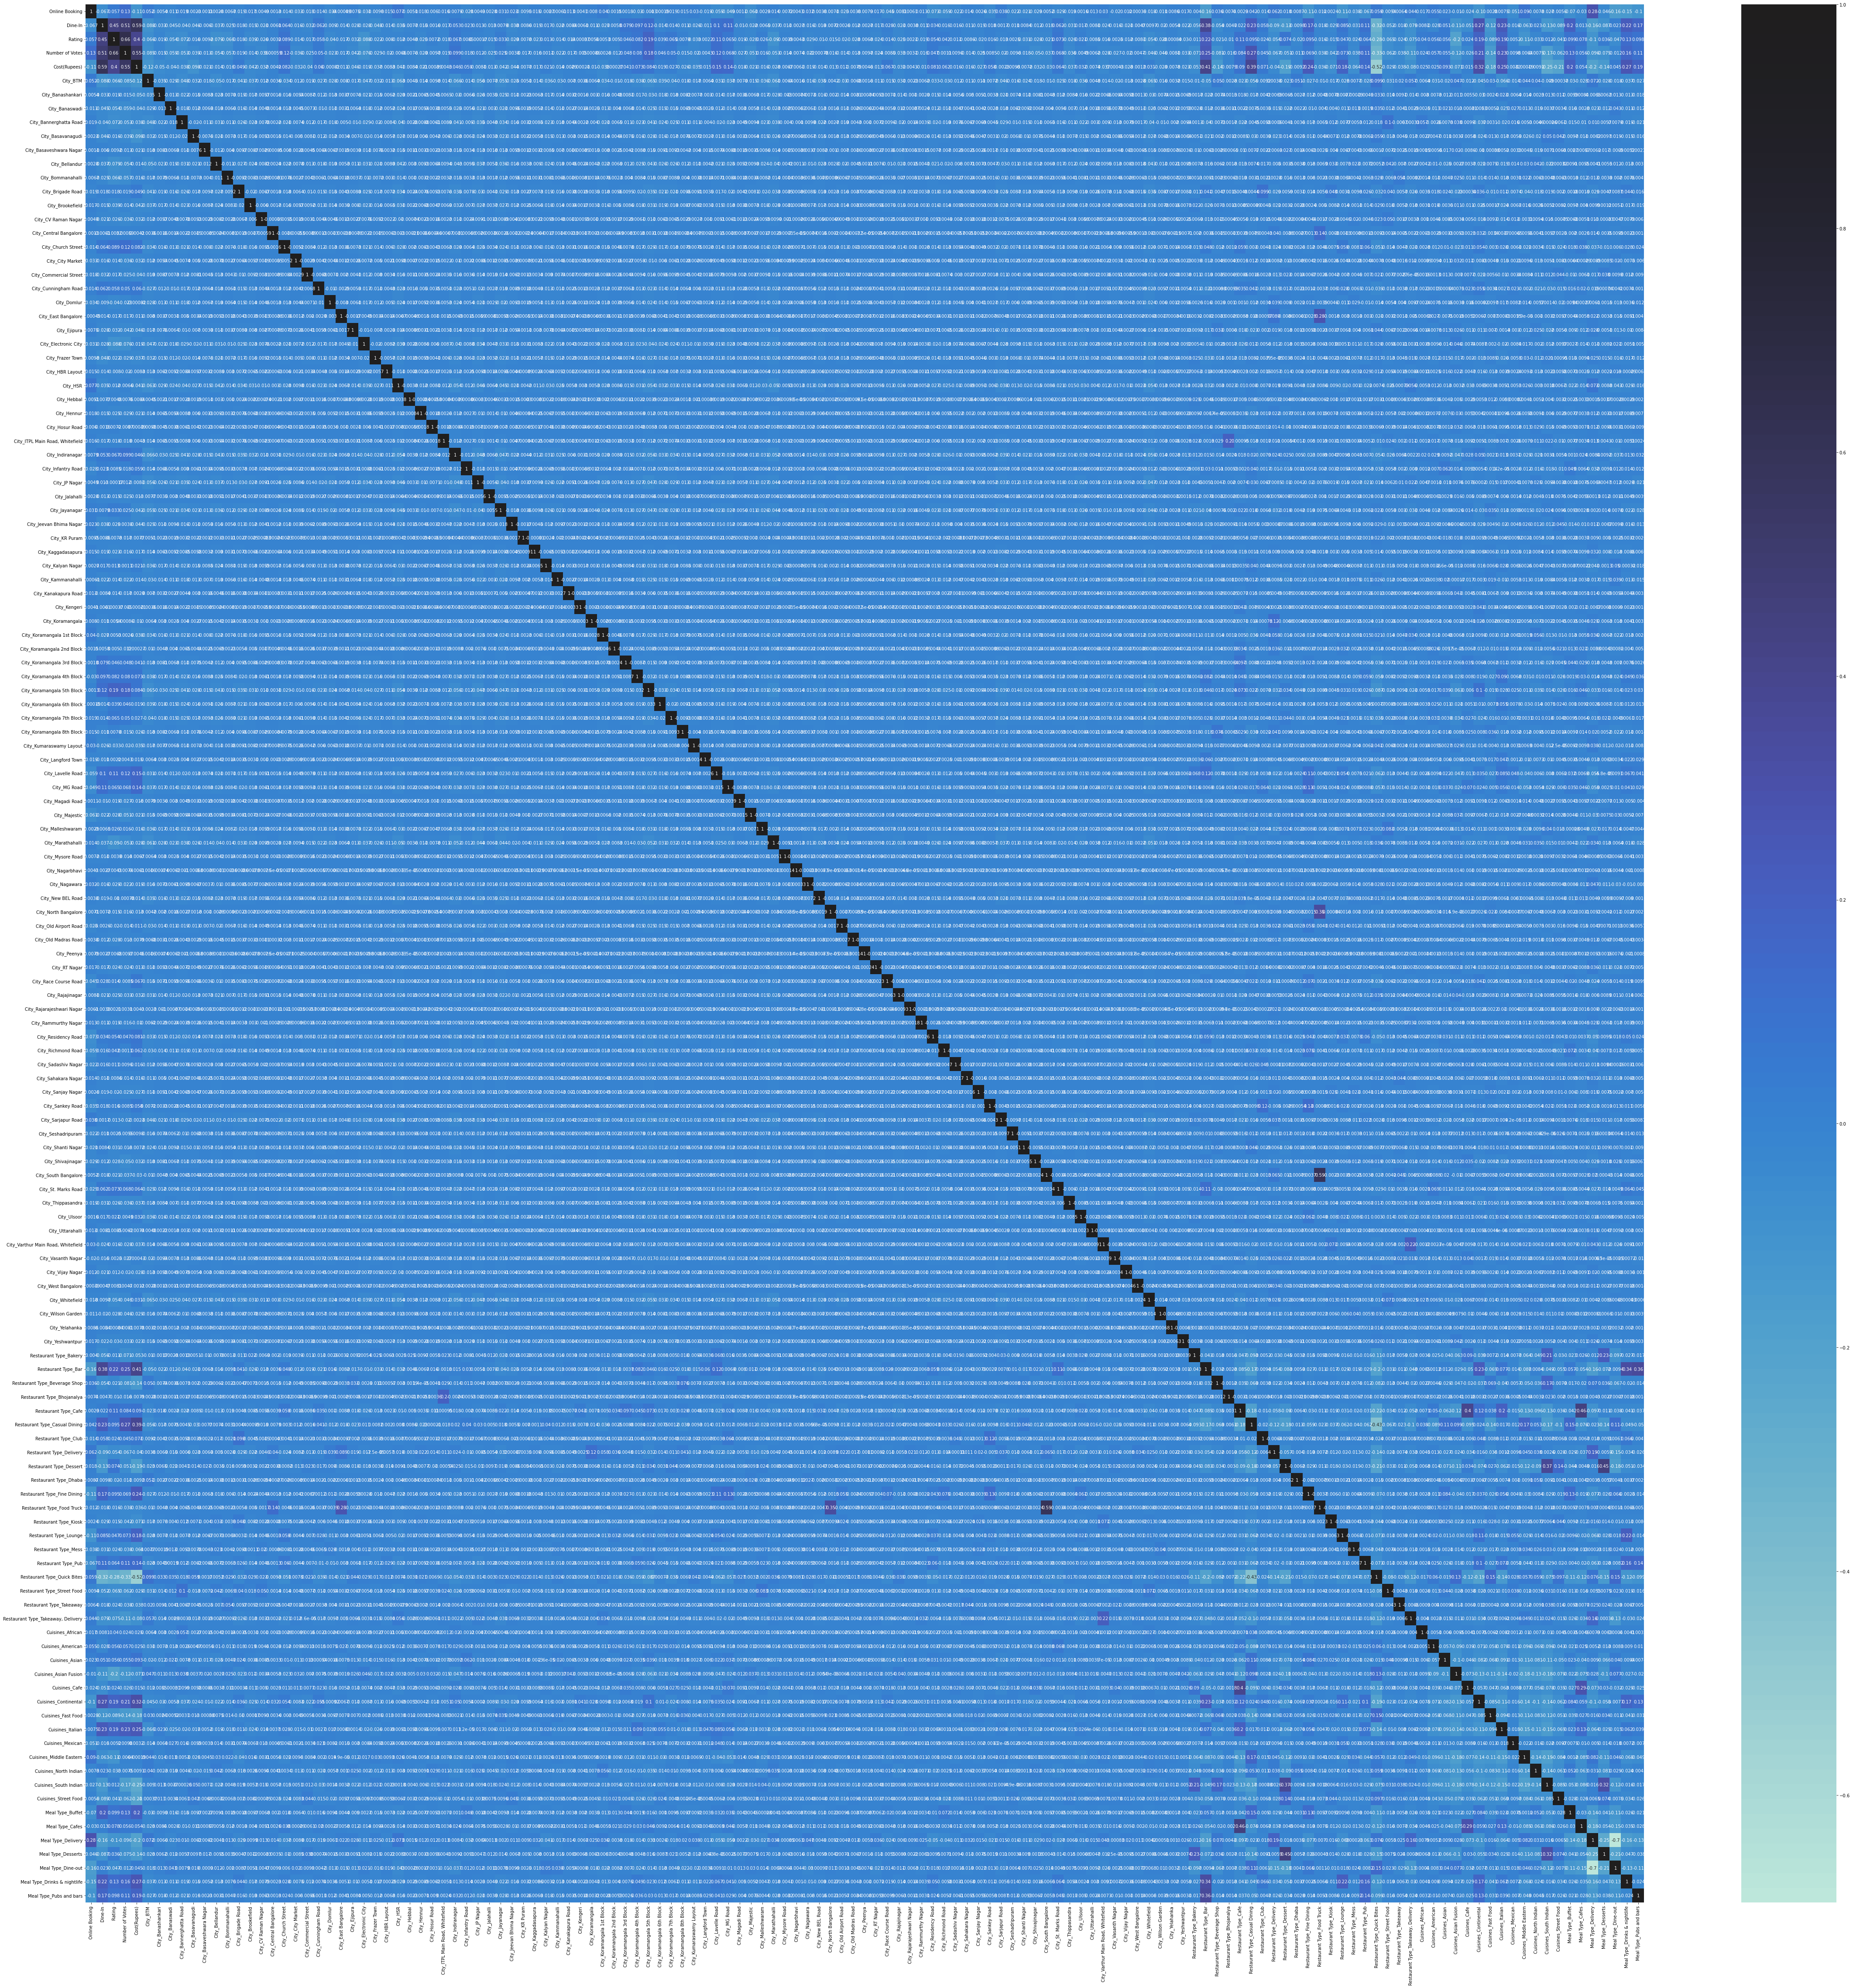

In [ ]:
plt.figure(figsize = (80, 80))
corr=data_norm.corr()
sns.heatmap(corr, annot = True, center=1)
plt.show()

That a huge heatmap but once we zoom in a bit, we can see points where the correlation is closer to 1 or -1. Just viewing the Rating column, we can quickly identify that Number of Votes, Reservation Needed?, and Cost(Rupees) have a higher correlation on Rating. We can also check for multicollinearity. For each of those significant variables, we can see if they have an impact on each other. Looking at the heat map can be hard to see so we can check for the Variance Inflation Factor for each variable. VIF is a measure of multicollinearity in the set of multiple regression variables. The higher the value of VIF, the higher the correlation between this variable and the rest.

In [ ]:
data_norm = data_norm.dropna()

It is usually considered to be highly correlated if the VIF value is higher than 10. None of the values we were looking at show a VIF value of 10 so we can assume there is no multicollinearly.

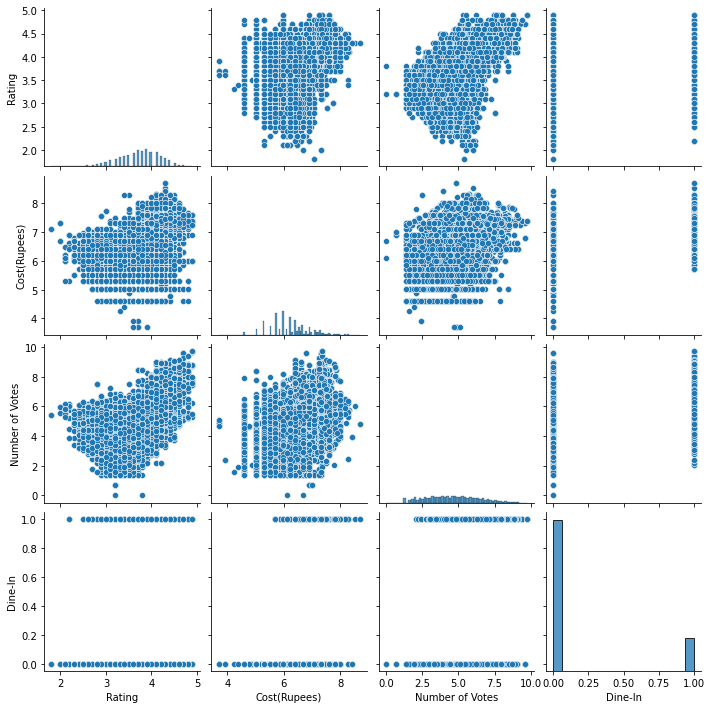

In [ ]:
sns.pairplot(data_norm, vars=['Rating','Cost(Rupees)', 'Number of Votes', 'Dine-In'])

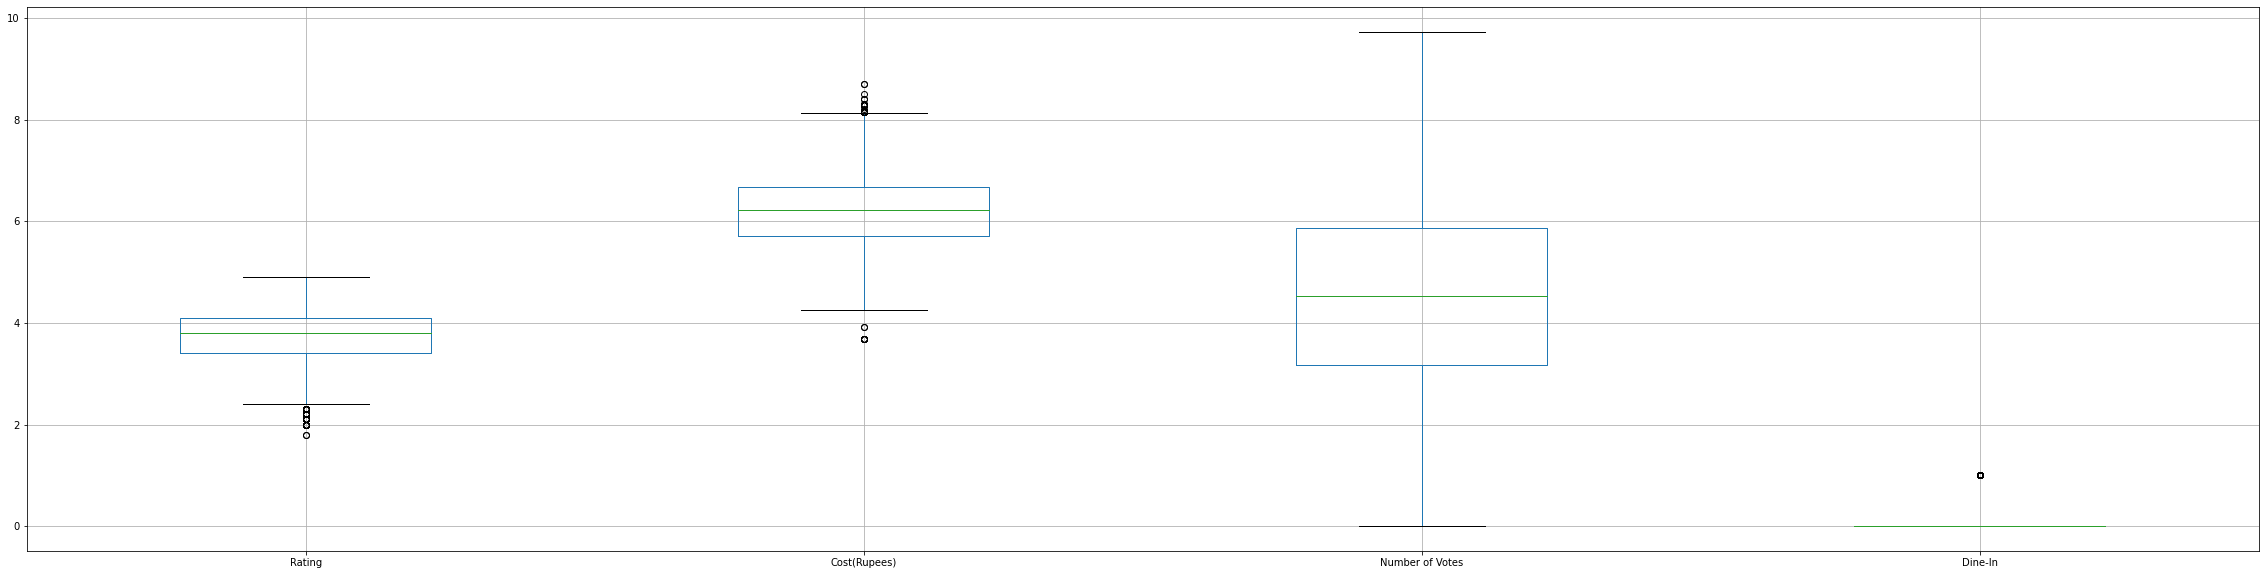

In [ ]:
plt.figure(figsize=(40,10))
data_norm.boxplot(column=['Rating','Cost(Rupees)', 'Number of Votes', 'Dine-In'])

Comparing the heatmap, correlation matrix, and pairplots we see that Rating is correlated by Cost(Rupees), Number of Votes, and if Reservation is needed.

##Building the Model

##Linear Regression Modelling

In [ ]:
from sklearn.model_selection import  train_test_split

trainingData = data_norm[['Rating', 'Number of Votes', 'Cost(Rupees)', 'Dine-In']]
#Splitting the columns into Target and Predictor variables
X = trainingData.drop(['Rating'],axis=1)
Y = trainingData['Rating']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

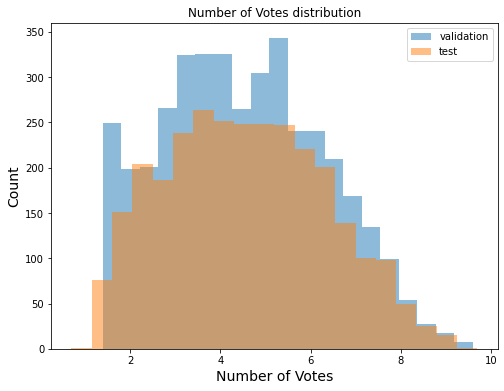

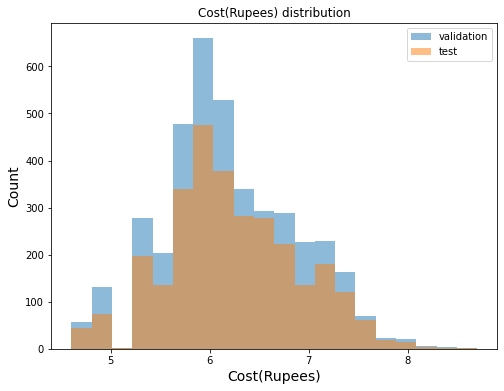

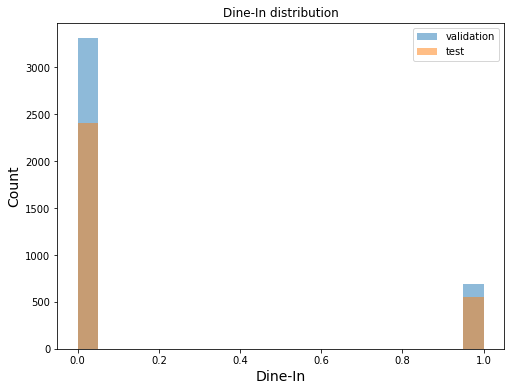

In [ ]:
X_test_plot = X_test[['Number of Votes', 'Cost(Rupees)', 'Dine-In']]

X_train_plot = X_val[['Number of Votes', 'Cost(Rupees)', 'Dine-In']]

X_train_plot = X_train[['Number of Votes', 'Cost(Rupees)', 'Dine-In']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_test,y_test)

LinearRegression()

##Making predictions

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.12
Coefficient of determination: 0.45
R^2 score on training set = 0.453242048477268


In [ ]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.12
Coefficient of determination: 0.44
R^2 score on validation set = 0.4444408739818192


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.12
Coefficient of determination: 0.45
R^2 score on test set = 0.453242048477268


##Outliers

Now, we can standardize our dependent variable to

In [ ]:
#standardizing data
from sklearn.preprocessing import StandardScaler
rating_scaled = StandardScaler().fit_transform(data_norm['Rating'][:,np.newaxis]);
low_range = rating_scaled[rating_scaled[:,0].argsort()][:10]
high_range= rating_scaled[rating_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-4.27450976]
 [-4.27450976]
 [-3.83220845]
 [-3.83220845]
 [-3.83220845]
 [-3.83220845]
 [-3.83220845]
 [-3.83220845]
 [-3.83220845]
 [-3.83220845]]

outer range (high) of the distribution:
[[2.58116045]
 [2.58116045]
 [2.58116045]
 [2.58116045]
 [2.58116045]
 [2.58116045]
 [2.58116045]
 [2.58116045]
 [2.58116045]
 [2.58116045]]


<ipython-input-81-e2cab239b2a5>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  rating_scaled = StandardScaler().fit_transform(data_norm['Rating'][:,np.newaxis]);


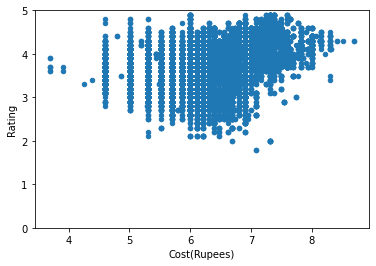

In [ ]:
#bivariate analysis Rating/Cost
var = 'Cost(Rupees)'
data = pd.concat([data_norm['Rating'], data_norm[var]], axis=1)
data.plot.scatter(x=var, y='Rating', ylim=(0,5));

Plotting the two numerical variables against the standardized Rating, we do not see any outliers.

In [ ]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

###Answers for the above questions

1.**What are the data types? (Only numeric and categorical)**
<br>Meal Type: categorical 
<br>Rating - numeric (The dependent variable) 
<br>Number of Votes - numeric 
<br>Online Booking - categorical
<br>Dine-In - categorical 
<br>City - categorical 
<br>Restaurant Type -categorical 
<br>Cuisines - categorical 
<br>Cost - numeric

2.**Are there missing values?** 
<br>Yes there are missing values mostly with ratings because there can be a case that the resturant is newly launched. We also saw missing values for City, Restaurant Type, Cuisine, and Cost(Rupees).

3.**What are the likely distributions of the numeric variables?**
<br>Both Cost(Rupees) and Votes are skewed right. The rating has a normal distribution.

4.**Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**
<br>pairplots, heatmaps, and box plots, it was discovered that Cost, Votes, and Reservation (whether or not a reservation is required) have a correlation with our dependent variable rating and are thus the most useful at predicting a target.

5.**Which independent variables have missing data? How much?**
<br>City has 0.04% missing data,Restaurant Type has 0.44% missing data,Cuisines has 0.09% missing data,Cost(Rupees) has 0.67% missing data

6.**Do the training and test sets have the same data?**
<br>Yes, the training and test data sets have overlapping data points. However, we split the data to have more values in the training set over the test set.

7.**In the predictor variables independent of all the other predictor variables?**
<br>Yes, by analzying the pairplots, heatmaps, and boxplots we can see that our data set does not have multicollinearity.

8.**Which predictor variables are the most important?**
<br>The most important variables for our model are the Cost(Rupees), Number of Votes, and Reservation.

9.**What are the distributions of the predictor variables?**
<br>Looking at the Q-Q plots, it appears that all independednt variables are roughly following normal distribution

10.**Do the ranges of the predictor variables make sense?**

In [ ]:
data.describe()

Rating  Number of Votes
count  29638.000000     30958.000000
mean       3.732850       407.242264
std        0.452188       989.323822
min        1.800000         0.000000
25%        3.400000        20.000000
50%        3.800000        81.000000
75%        4.100000       334.000000
max        4.900000     16832.000000

###Conclusion
From the analysis done above on the data set, it is clear that there is multicolinearity and ecxpet length all other dependent variables are significant.



References

https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea

https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook

https://www.kaggle.com/code/sanskrutikunjir/eda-notebook-sanskruti-kunjir

Sckit learn offcial documentation

Refered Towards Data Science

Eli5 official documentation

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide and Towards Data Science (How do you check the quality of your regression model in Python?). The remaining code was written independently. Feature importance reference is taken from eli5 offical documnetation.

Copyright (C) <2022> Divya Myneni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.